In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geoscripts import gchemplots as gp

import warnings
warnings.filterwarnings("ignore")

In [98]:
# Pearce08 Fields (for future function)
from matplotlib.patches import Polygon
# MORB-OIB Array
x = [0.1,0.3,1000,1000,800,0.1]
y = [0.01,0.01,48,100,100,0.01]
xy_array = np.column_stack((x,y))

# Arc Array
b = (np.log10(10)-np.log10(1.2))/(np.log10(0.8)-np.log10(0.1))
a = np.log10(10)-np.log10(0.8)
xvals = np.arange(0,1000)
yvals = a*np.power(xvals,b)

In [99]:
# Read in organized data
data = pd.read_csv('processed/data.csv',index_col=0)

# Filter for J and mafic
ternary_total = data['Ta']*2+data['Tb']*3+data['Th']
filter_period = (data['Period']=='Jurassic')|(data['Period']=='Jurassic?')
filter_major =  (data['SiO2']<57)
filter_trace = (data['Tb']*3/ternary_total>0.5)

data_filtered = data[filter_period&filter_major]
data_gtoid = data[data['SiO2']>=57]

print(data_filtered.index)

Index(['G22032A', 'G22033', 'G22034', 'G22035', 'G22037', 'G22038', 'G22039',
       'G22041A', 'G22041C', 'G22042', 'G22044', 'G22045', 'G22046C', 'G22049',
       'G22051', 'G22053', 'G22063', 'G22065', 'G22066', 'G22067', 'G22068A',
       'G22068B', 'G22068C', 'G22069', 'G22076', 'G22081', 'G22091', 'G22092',
       'G22094', 'G22108A', 'G22109', 'G22118', 'G22119', 'G22126', 'G22141'],
      dtype='object')


<TernaryAxes: tlabel='3Tb', llabel='Th', rlabel='2Ta'>

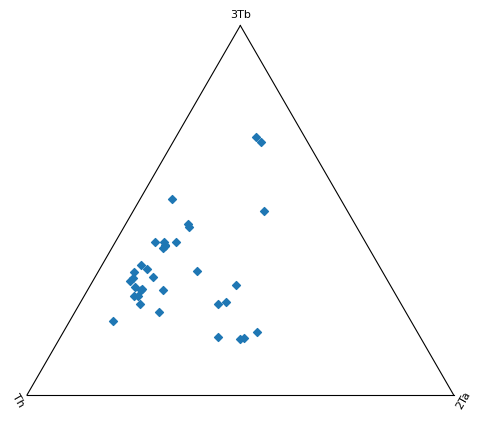

In [100]:
Tb,Th,Ta = data_filtered[['Tb','Th','Ta']].T.values

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')
gp.cabanis(Tb,Th,Ta)

4
4


<Axes: ylabel='Sample/Primitive Mantle'>

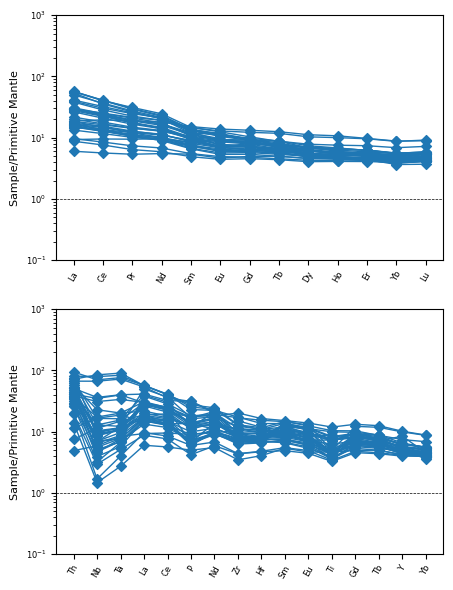

In [101]:
fig,axs = plt.subplots(2,figsize=(5,7))
gp.REE(data_filtered,ax=axs[0])
gp.immobile(data_filtered,ax=axs[1])

4
4


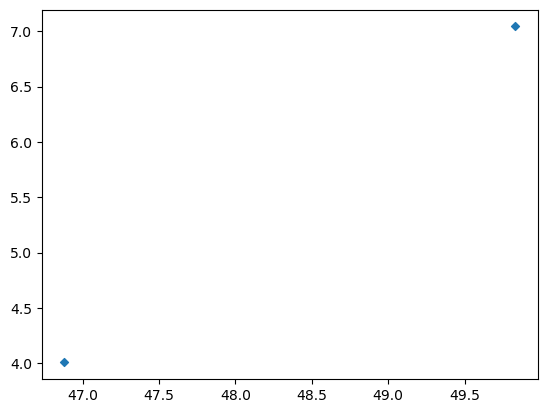

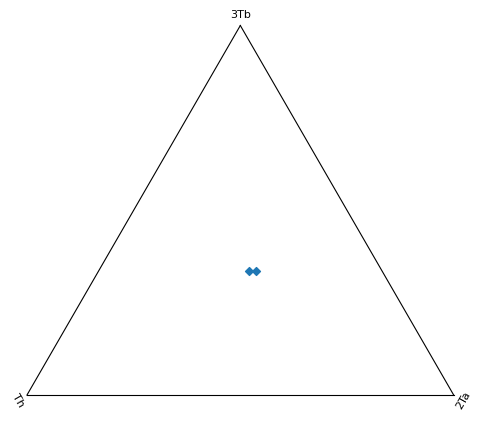

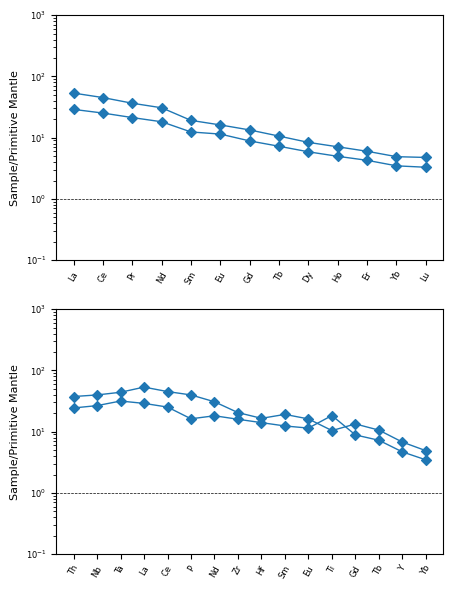

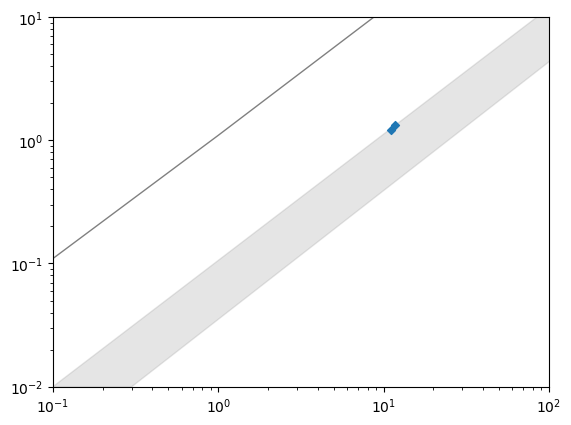

In [110]:
# Look at specific samples

samples = ['G22120','G22122']

smp_data = data.loc[samples]

SiO2,Na2O,K2O = smp_data[['SiO2','Na2O','K2O']].T.values
gp.TASsm(SiO2,Na2O,K2O)

Tb,Th,Ta = smp_data[['Tb','Th','Ta']].T.values

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')
gp.cabanis(Tb,Th,Ta)

fig2,axs = plt.subplots(2,figsize=(5,7))
gp.REE(smp_data,ax=axs[0])
gp.immobile(smp_data,ax=axs[1])

fig5,ax5 = plt.subplots(1)
ax5.scatter(smp_data['Nb']/smp_data['Yb'],smp_data['Th']/smp_data['Yb'])
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlim(0.1,100)
ax5.set_ylim(0.01,10)
pgon = Polygon(xy_array,alpha=0.2,zorder=0,color='gray')
ax5.add_patch(pgon)
ax5.plot(xvals,yvals,color='gray')


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


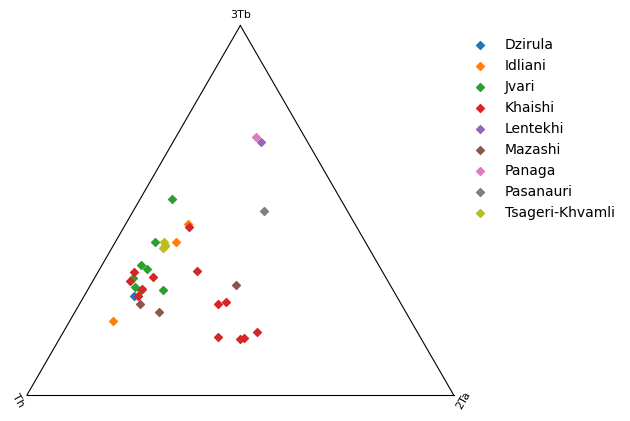

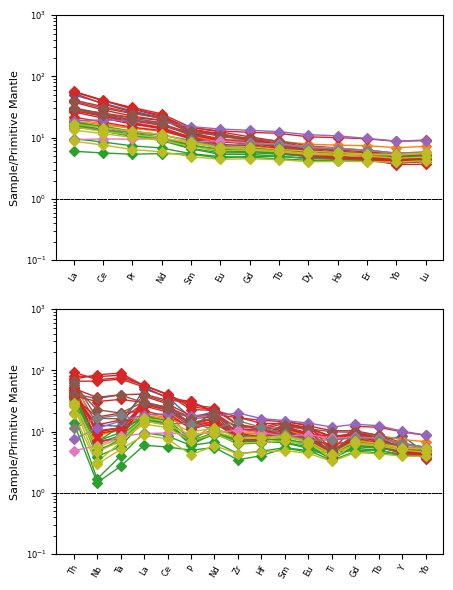

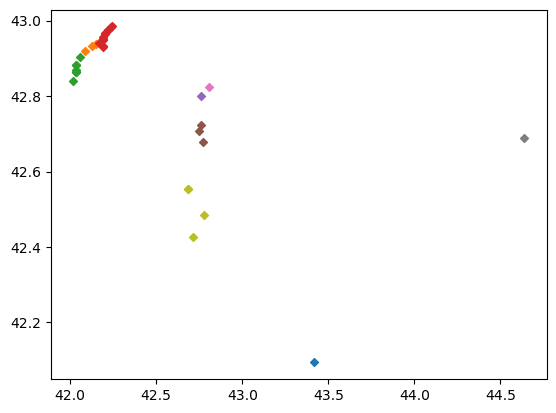

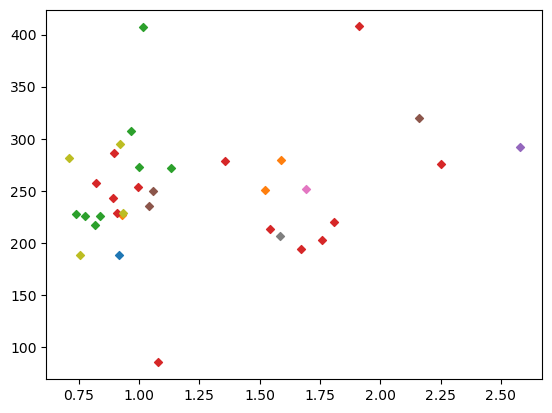

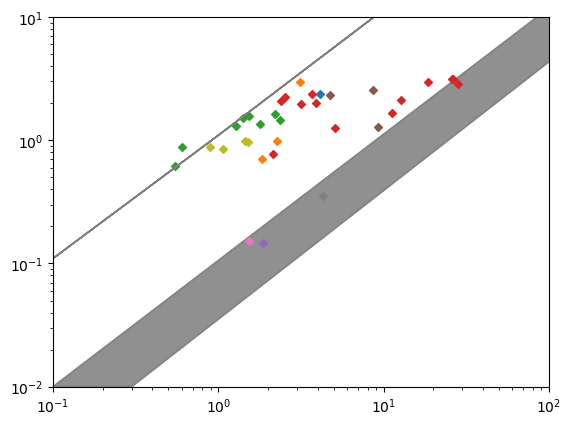

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')

fig2,axs = plt.subplots(2,figsize=(5,7))

fig3,ax3 = plt.subplots(1)
fig4,ax4 = plt.subplots(1)
fig5,ax5 = plt.subplots(1)

lat = pd.cut(data_filtered['Latitude'],4)
lon = pd.cut(data_filtered['Longitude'],4)
# domain = pd.cut(data_filtered['S_Domain'])

groups = data_filtered.groupby(data_filtered['S_Domain'])
for k, group in groups:
    Tb,Th,Ta = group[['Tb','Th','Ta']].T.values
    gp.cabanis(Tb,Th,Ta,ax=ax,label=k)
    gp.REE(group,ax=axs[0])
    gp.immobile(group,ax=axs[1])
    ax3.scatter(group['Longitude'],group['Latitude'])
    ax4.scatter(group['TiO2'],group['V'])
    ax5.scatter(group['Nb']/group['Yb'],group['Th']/group['Yb'])
    ax5.set_xscale('log')
    ax5.set_yscale('log')
    ax5.set_xlim(0.1,100)
    ax5.set_ylim(0.01,10)
    pgon = Polygon(xy_array,alpha=0.2,zorder=0,color='gray')
    ax5.add_patch(pgon)
    ax5.plot(xvals,yvals,color='gray')

ax.legend()

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


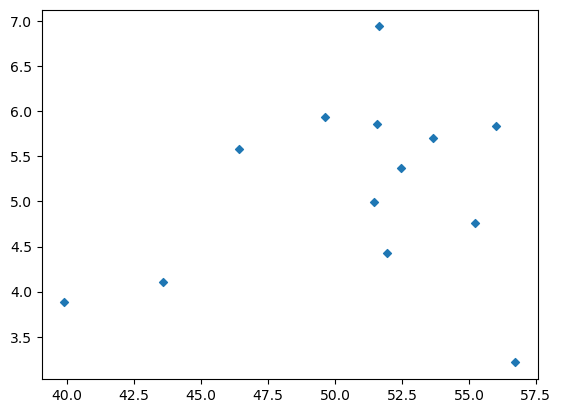

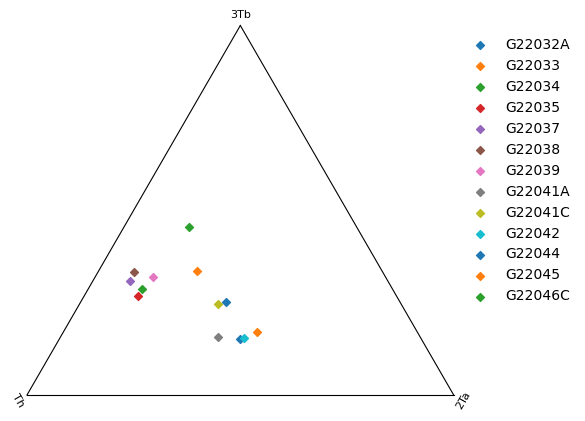

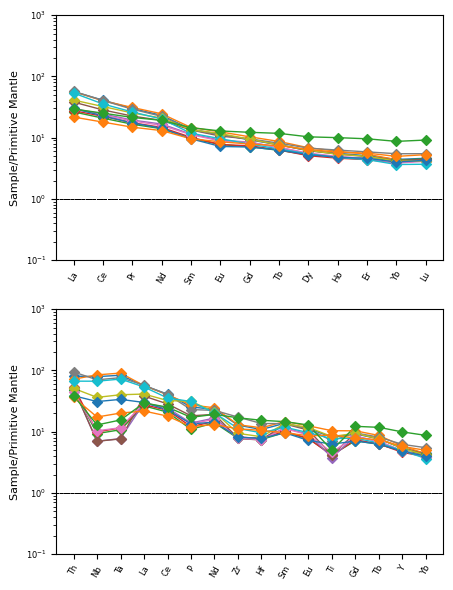

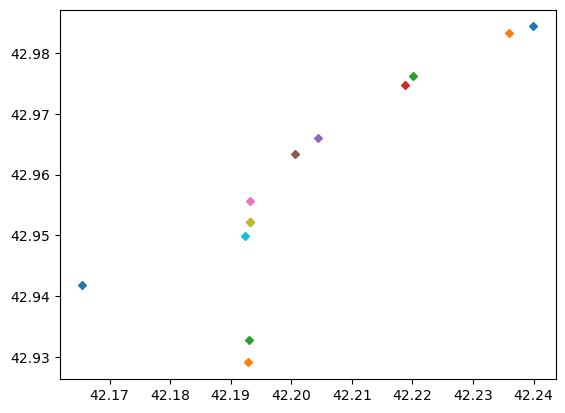

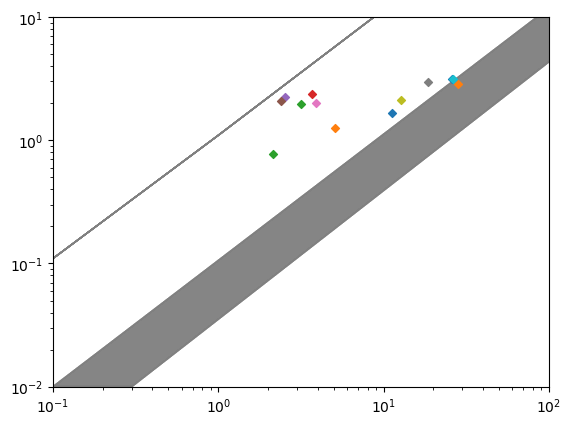

In [104]:
smp_data = data_filtered[data_filtered['S_Domain']=='Khaishi']

SiO2,Na2O,K2O = smp_data[['SiO2','Na2O','K2O']].T.values
gp.TASsm(SiO2,Na2O,K2O)

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')

fig2,axs = plt.subplots(2,figsize=(5,7))
fig3,ax3 = plt.subplots(1)
fig5,ax5 = plt.subplots(1)

smp_groups = smp_data.groupby(smp_data.index)

for k,group in smp_groups:
    Tb,Th,Ta = group[['Tb','Th','Ta']].T.values
    gp.cabanis(Tb,Th,Ta,ax=ax,label=k)
    gp.REE(group,ax=axs[0])
    gp.immobile(group,ax=axs[1])
    ax3.scatter(group['Longitude'],group['Latitude'])
    ax5.scatter(group['Nb']/group['Yb'],group['Th']/group['Yb'])
    ax5.set_xscale('log')
    ax5.set_yscale('log')
    pgon = Polygon(xy_array,alpha=0.2,zorder=0,color='gray')
    ax5.add_patch(pgon)
    ax5.plot(xvals,yvals,color='gray')
    ax5.set_xlim(0.1,100)
    ax5.set_ylim(0.01,10)

ax.legend()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4
4
4
4
4
4


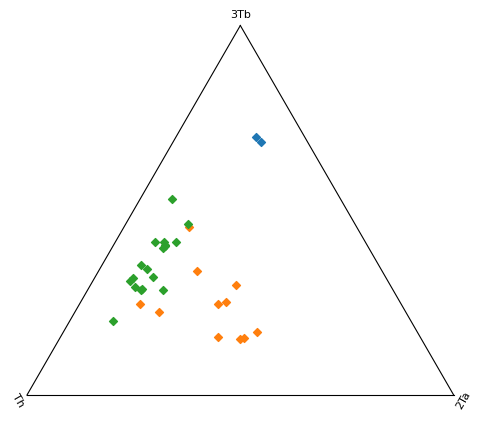

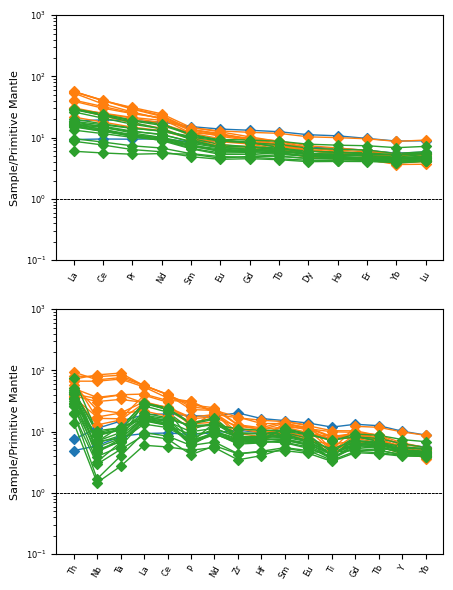

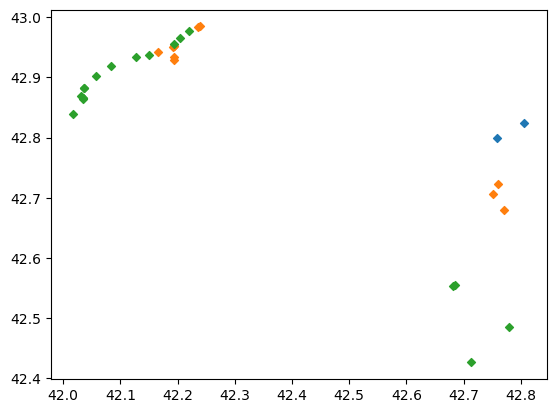

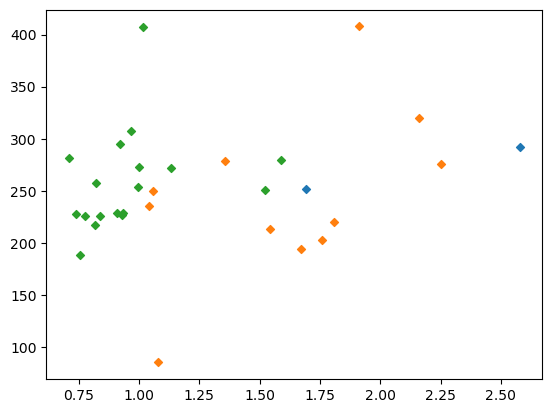

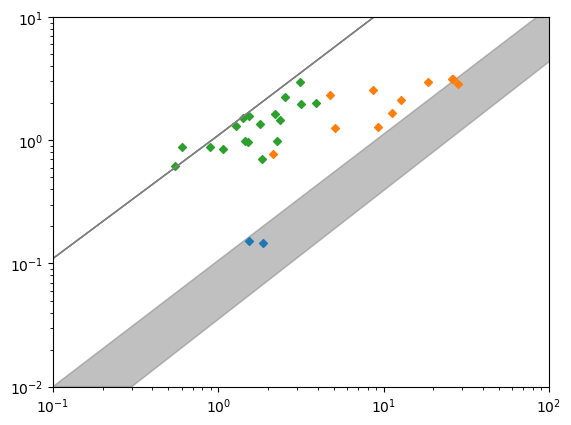

In [105]:
# Plot according to structural framework from above plot

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')

fig2,axs = plt.subplots(2,figsize=(5,7))

fig3,ax3 = plt.subplots(1)
fig4,ax4 = plt.subplots(1)
fig5,ax5 = plt.subplots(1)

morb = data_filtered['S_Domain'].isin(['Lentekhi','Panaga'])
mazashi = data_filtered['S_Domain']=='Mazashi'
khaishi_limbs = data_filtered.index.isin(['G22032A','G22033','G22042','G22046C',
                                          'G22045','G22044','G22041C','G22041A'])
khaishi_core = data_filtered.index.isin(['G22034','G22036A','G22037','G22038B','G22039'])
southern = data_filtered['S_Domain'].isin(['Idliani','Jvari','Tsageri-Khvamli'])

north = data_filtered[morb]
central = data_filtered[mazashi|khaishi_limbs]
south = data_filtered[khaishi_core|southern]

groups = [north,central,south]
for group in groups:
    Tb,Th,Ta = group[['Tb','Th','Ta']].T.values
    gp.cabanis(Tb,Th,Ta,ax=ax)
    gp.REE(group,ax=axs[0])
    gp.immobile(group,ax=axs[1])
    ax3.scatter(group['Longitude'],group['Latitude'])
    ax4.scatter(group['TiO2'],group['V'])
    ax5.scatter(group['Nb']/group['Yb'],group['Th']/group['Yb'])
    ax5.set_xscale('log')
    ax5.set_yscale('log')
    pgon = Polygon(xy_array,alpha=0.2,zorder=0,color='gray')
    ax5.add_patch(pgon)
    ax5.plot(xvals,yvals,color='gray')
    ax5.set_xlim(0.1,100)
    ax5.set_ylim(0.01,10)

ax.legend()

Index(['G22019', 'G22020', 'G22036A', 'G22096', 'G22110', 'G22111', 'G22114',
       'G22125', 'G22129', 'G22130', 'G22131', 'G22173', 'G22184', 'G22186'],
      dtype='object')


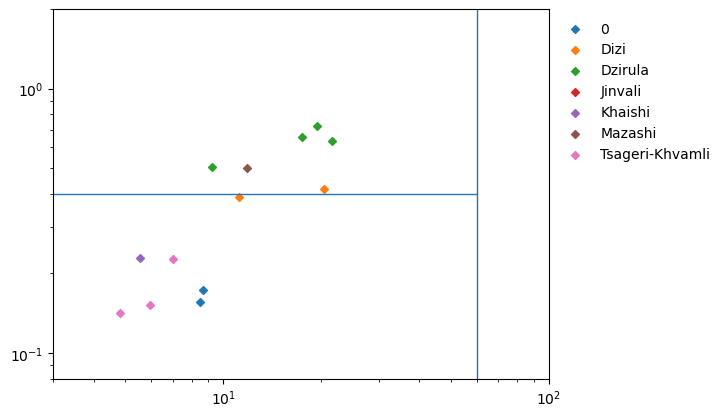

In [106]:
# plot gtoids on whalen plot

fig, ax = plt.subplots(1)

ax.set_xlim(3,100)
ax.set_ylim(0.08,2)
ax.set_xscale('log')
ax.set_yscale('log')

ax.vlines(60,ymin=0.01,ymax=10)
ax.hlines(y=0.4,xmin=1,xmax=60)

x = data_gtoid['Nb']+data_gtoid['Yb']
y = data_gtoid['Nb']/data_gtoid['Y']

print(data_gtoid.index)

groups = data_gtoid.groupby('S_Domain')

for k,group in groups:
    x = group['Nb']+group['Yb']
    y = group['Nb']/group['Y']

    ax.scatter(x,y,label=k)

    #ax.annotate(group.index[0][-3:],(x,y))

ax.legend()